In [3]:
import pandas as pd

df = pd.read_csv("customer_segmentation.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
X = df.select_dtypes(include="number")
X = X.fillna(X.mean())

feature_names = X.columns
feature_names

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'KMeans_Cluster', 'Hierarchical_Cluster'],
      dtype='object')

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,KMeans_Cluster,Hierarchical_Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1,2
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,1,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,0,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,0,1


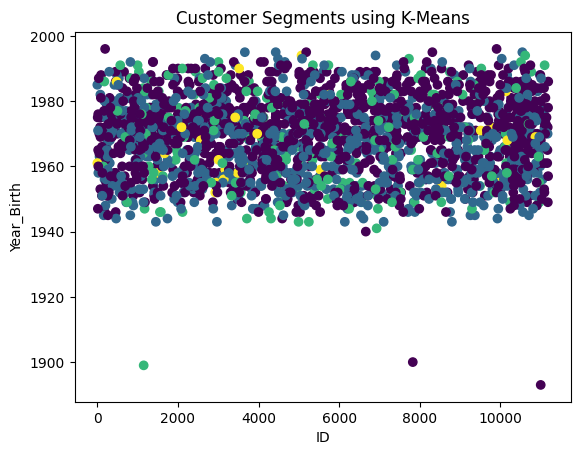

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df["KMeans_Cluster"])

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Customer Segments using K-Means")
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4)
df["Hierarchical_Cluster"] = hc.fit_predict(X_scaled)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,KMeans_Cluster,Hierarchical_Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,3,2
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,3,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,0,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,0,1


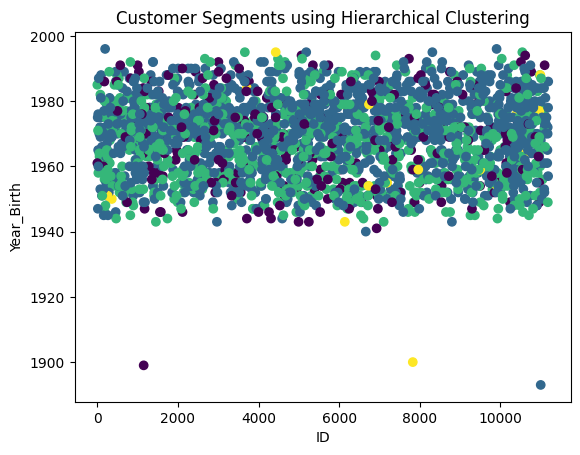

In [17]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df["Hierarchical_Cluster"])

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Customer Segments using Hierarchical Clustering")
plt.show()

In [10]:
df[["KMeans_Cluster", "Hierarchical_Cluster"]].head(10)

,KMeans_Cluster,Hierarchical_Cluster
0,3,2
1,0,1
2,3,2
3,0,1
4,0,1
5,1,2
6,1,2
7,0,1
8,0,1
9,0,1


In [11]:
print("K-Means cluster count:")
print(df["KMeans_Cluster"].value_counts())

print("\nHierarchical cluster count:")
print(df["Hierarchical_Cluster"].value_counts())

K-Means cluster count:
KMeans_Cluster
0    1019
1     599
3     451
2     171
Name: count, dtype: int64

Hierarchical cluster count:
Hierarchical_Cluster
1    1229
2     743
0     247
3      21
Name: count, dtype: int64
